In [1]:
import os
user = os.getenv('USER')
import sys
sys.path.insert(0, f'/Home/{user}/py/stereoid')
import glob
from cmocean import cm

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import LAND, COASTLINE

from harmony23lib import get_deformation_mosaic

In [2]:
xlim = [-15e5, 15e5, 3e3]
ylim = [-15e5, 15e5, 3e3]

In [3]:
idir_mask = f'/data1/{user}/stereoid/RESULTS/SeaIce/SeaIceDrift/pass_sa05_2019_exp_00_20190101*_??.npz'
ifiles = sorted(glob.glob(idir_mask))

div_pro_avg0 = get_deformation_mosaic(ifiles, xlim, ylim, ename='div')
she_pro_avg0 = get_deformation_mosaic(ifiles, xlim, ylim, ename='she')

idir_mask = f'/data1/{user}/stereoid/RESULTS/SeaIce/SeaIceDrift/pass_sa05_2019_exp_01_20190101*_??.npz'
ifiles = sorted(glob.glob(idir_mask))

div_pro_avg1 = get_deformation_mosaic(ifiles, xlim, ylim, ename='div')
she_pro_avg1 = get_deformation_mosaic(ifiles, xlim, ylim, ename='she')

In [4]:
def make_six_maps(xlim, ylim, div_pro_avg, div_cmap, div_clim, she_pro_avg, she_cmap, she_clim, figsize=(12,18)):
    srs_dst = ccrs.NorthPolarStereo(central_longitude=0, true_scale_latitude=60)
    map_extent = [xlim[0], xlim[1], ylim[0], ylim[1]]

    fig, axs = plt.subplots(3,2, figsize=figsize, subplot_kw={'projection': srs_dst}, sharex=True, sharey=True)
    for i in range(3):
        imsh_div = axs[i, 0].imshow(div_pro_avg[i], extent=[xlim[0], xlim[1], ylim[1], ylim[0]], cmap=div_cmap, clim=div_clim)
        imsh_she = axs[i, 1].imshow(she_pro_avg[i], extent=[xlim[0], xlim[1], ylim[1], ylim[0]], cmap=she_cmap, clim=she_clim)
        
    for ax in axs.flat:
        ax.add_feature(LAND)
        ax.add_feature(COASTLINE)
        ax.set_extent(map_extent, crs=srs_dst)
        ax.plot(0, 0, 'b.')

    cbar_ax1 = fig.add_axes([0.05, 0.01, 0.4, 0.02])
    cbar1 = fig.colorbar(imsh_div, cax=cbar_ax1, orientation='horizontal')
    cbar_ax2 = fig.add_axes([0.55, 0.01, 0.4, 0.02])
    cbar2 = fig.colorbar(imsh_she, cax=cbar_ax2, orientation='horizontal')

    axs[0,0].set_title(r'$\nabla$')
    axs[0,1].set_title(r'$\tau$')
    axs[1,0].set_title(r'$\nabla^{M2}$')
    axs[1,1].set_title(r'$\tau^{M2}$')
    axs[2,0].set_title(r'$\nabla^{A}$')
    axs[2,1].set_title(r'$\tau^{A}$')
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_76974/3600986429.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


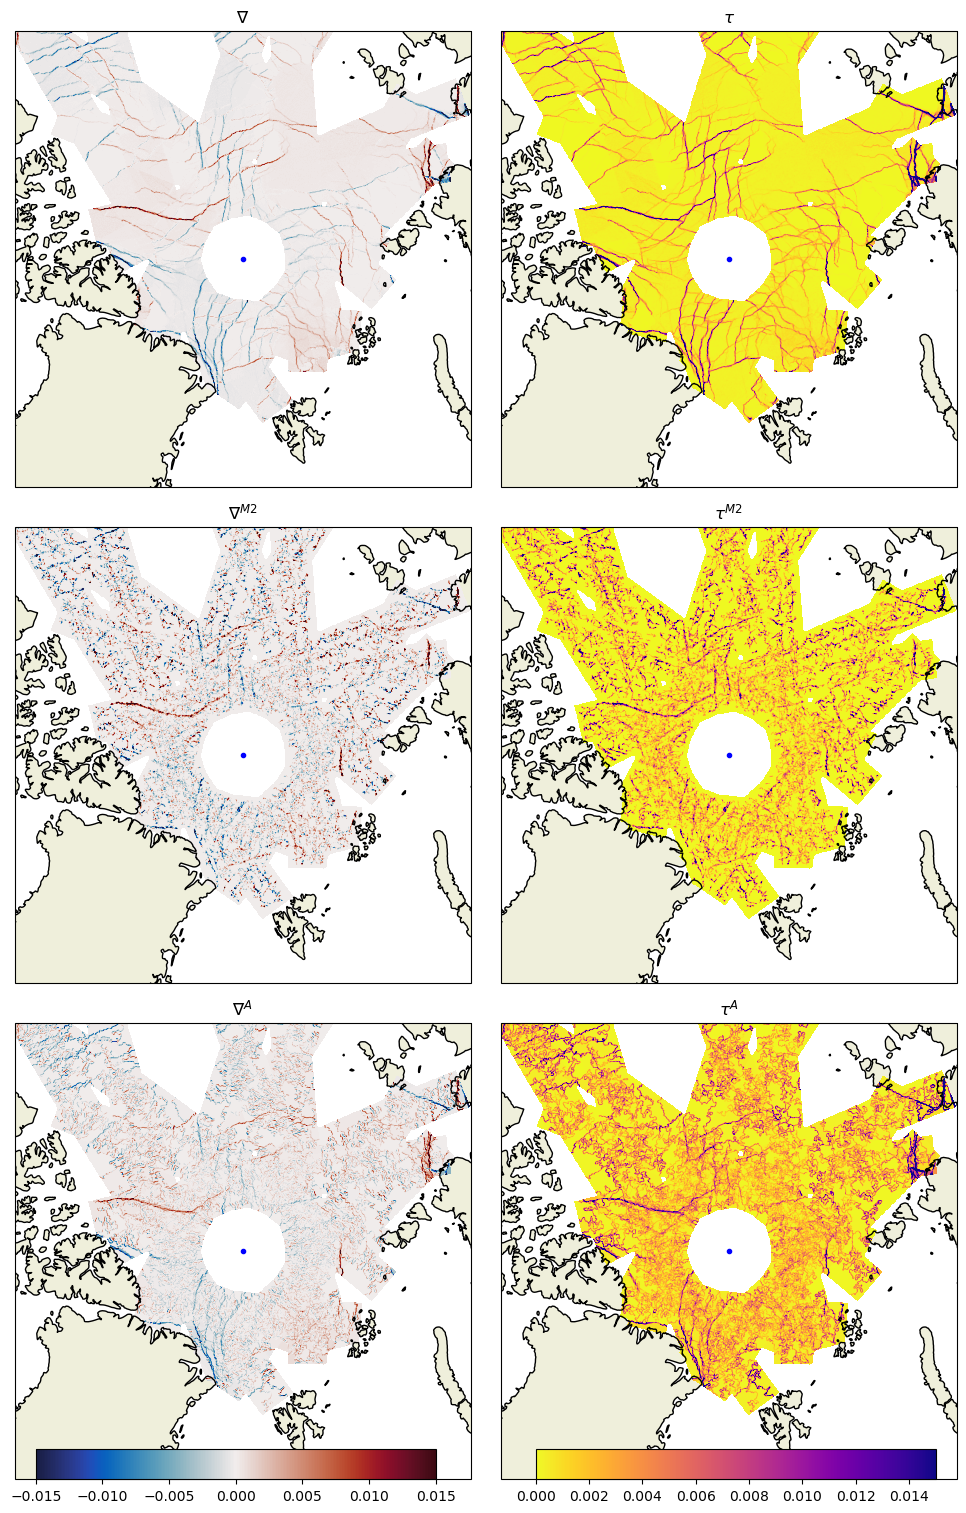

In [5]:
vmax = 0.015
make_six_maps(xlim, ylim, div_pro_avg0, cm.balance, [-vmax, vmax], she_pro_avg0, 'plasma_r', [0, vmax], figsize=(10,15))

/tmp/ipykernel_76974/3600986429.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


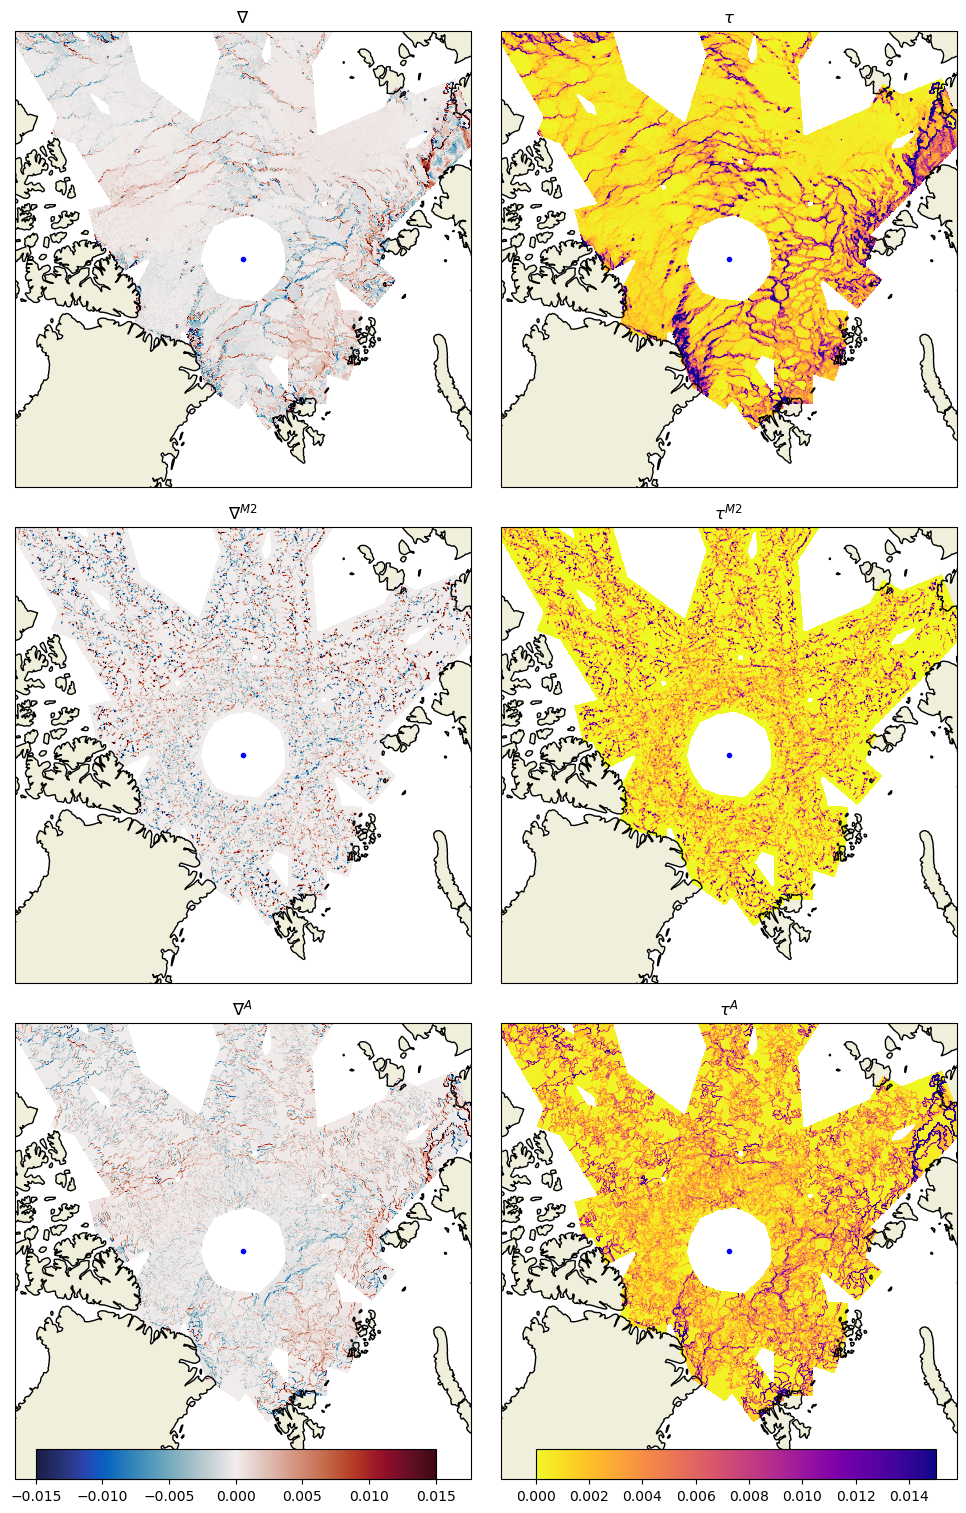

In [6]:
make_six_maps(xlim, ylim, div_pro_avg1, cm.balance, [-vmax, vmax], she_pro_avg1, 'plasma_r', [0, vmax], figsize=(10,15))